In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy import stats
from functools import partial
import pickle
from tqdm import tqdm

In [7]:
def poisson_dist(x, l):
    return np.exp(-l)*np.power(l, x)/factorial(x)

def normal_dist(x, mean , sd):
#     prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    sqrt_2pi = np.sqrt(2*np.pi)
    prob_density = 1.0/(sqrt_2pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
#     return stats.norm(mean, sd).pdf(x)

def uniform_dist(x, a, b):
    return (x*0 + 1) * (1.0 / (b-a))

def sin_dist(x):
    return np.abs(np.sin(x/2)) * 0.2

def sin_damping_dist(x):
    return np.abs(np.sin(x/2)) * 0.2 * np.exp(-x/5)

In [65]:
def plot_compare(x, target_dist, proposal_dist, x_sampled, y_sampled, x_rejected, y_rejected):
    plt.figure()

    plt.plot(x, target_dist, label='poisson') 
    plt.fill_between(x, target_dist, 0, alpha=1, zorder=2)
    
    plt.plot(x, proposal_dist, label='proposal') 
    plt.fill_between(x, proposal_dist, 0, alpha=0.3, zorder=1)

    plt.scatter(x_sampled, y_sampled, s = 2, c = '#01FF70', zorder = 2)
    plt.scatter(x_rejected, y_rejected, s = 2, c = '#FF4136', zorder = 2)

    plt.xlim(0, x[-1]), plt.ylim(0, 0.4), plt.xlabel("x"), plt.ylabel("y"), plt.legend();
    plt.savefig('Accept-Reject.jpg', dpi=300)

## Uniform Distribution as Proposal

accepted 263
rejected 737


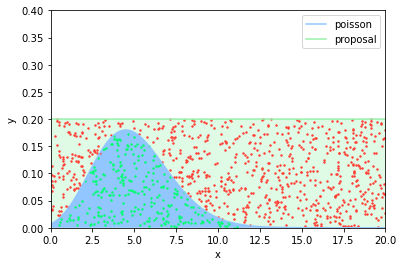

In [93]:
plt.style.use('seaborn-pastel')

x_min        = 0
x_max        = 20
points_per_x = 1000

x          = np.linspace(x_min, x_max, (x_max-x_min)*points_per_x)
c_proposal = 0.2 / 0.05
y_proposal = uniform_dist(x, 0, 20) * c_proposal
y_poisson  = poisson_dist(x, 5)
x_sampled  = []
y_sampled  = []
x_rejected = []
y_rejected = []

for it in range(1000):
    X = np.random.uniform(0, 20)
    U = np.random.uniform(0, 1)
    x_idx = np.where(x <= X)[0][-1]
    if U * y_proposal[x_idx] <= y_poisson[x_idx]:
        x_sampled.append(X)
        y_sampled.append(U * y_proposal[x_idx])
    else:
        x_rejected.append(X)
        y_rejected.append(U * y_proposal[x_idx])

print('accepted %d' % len(x_sampled))
print('rejected %d' % len(x_rejected))
    
plot_compare(x, y_poisson, y_proposal, 
            np.array(x_sampled),
            np.array(y_sampled),
            np.array(x_rejected),
            np.array(y_rejected))

## Normal Distribution as proposal

accepted 800
rejected 200


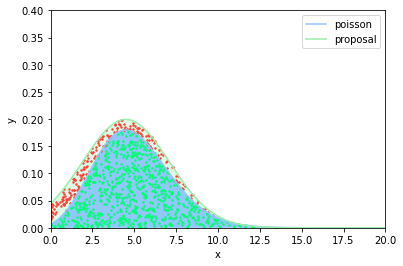

In [94]:
plt.style.use('seaborn-pastel')

x_min        = 0
x_max        = 20
points_per_x = 1000

x           = np.linspace(x_min, x_max, (x_max-x_min)*points_per_x)
c_proposal  = 1.3
normal_mean = 4.5;
normal_std  = 2.6;
y_proposal  = normal_dist(x, normal_mean, normal_std) * c_proposal
y_poisson   = poisson_dist(x, 5)
x_sampled   = []
y_sampled   = []
x_rejected  = []
y_rejected  = []

for it in range(1000):
    X = -1
    while X < 0:
        X = np.random.normal(normal_mean, normal_std)
    U = np.random.uniform(0, 1)
    x_idx = np.where(x <= X)[0][-1]
    if U * y_proposal[x_idx] <= y_poisson[x_idx]:
        x_sampled.append(X)
        y_sampled.append(U * y_proposal[x_idx])
    else:
        x_rejected.append(X)
        y_rejected.append(U * y_proposal[x_idx])

print('accepted %d' % len(x_sampled))
print('rejected %d' % len(x_rejected))
    
plot_compare(x, y_poisson, y_proposal, 
            np.array(x_sampled),
            np.array(y_sampled),
            np.array(x_rejected),
            np.array(y_rejected))